In [1]:
import os
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
import pandas as pd

<IPython.core.display.Javascript object>

In [2]:
#df_helix_v1 = DataFrameMaker(mu2e_ext_path+'datafiles/FieldMapsPure/DS-8_helix_no_leads',use_pickle = True).data_frame
#df_helix_v2 = DataFrameMaker(mu2e_ext_path+'datafiles/FieldMapsPure/DS-8_with_leads_TOL1e-5',use_pickle = True).data_frame
df_helix_v3 = DataFrameMaker(mu2e_ext_path+'datafiles/FieldMapsPure/test_helix_5L',input_type = 'pkl').data_frame
#df_helix_v4 = DataFrameMaker(mu2e_ext_path+'datafiles/FieldMapsPure/test_helix_5L_detail',use_pickle = True).data_frame

In [ ]:
df_helix_v3.eval('Br2 = (X*Bx+Y*By)/R', inplace=True)
df_helix_v3.eval('Bphi2 = (-Y*Bx+X*By)/R', inplace=True)

In [ ]:

df_helix_v3.eval('Br_diff = Br-Br2 ', inplace=True)
df_helix_v3.eval('Bphi_diff = Bphi-Bphi2', inplace=True)

In [8]:
mu2e_plot3d(df_helix_v3, 'Z', 'X', 'By', 'Y==0 and -900<X<900 and -2000<Z<2000',
            info = 'Helix3', df_fit=False, mode='plotly_nb', ptype='3d')

{'data': [{'colorbar': {'tickfont': {'size': 18},
    'title': 'Tesla',
    'titlefont': {'size': 20},
    'titleside': 'right'},
   'colorscale': 'Viridis',
   'type': 'surface',
   'x': array([[-1975., -1950., -1925., ...,  1925.,  1950.,  1975.],
          [-1975., -1950., -1925., ...,  1925.,  1950.,  1975.],
          [-1975., -1950., -1925., ...,  1925.,  1950.,  1975.],
          ...,
          [-1975., -1950., -1925., ...,  1925.,  1950.,  1975.],
          [-1975., -1950., -1925., ...,  1925.,  1950.,  1975.],
          [-1975., -1950., -1925., ...,  1925.,  1950.,  1975.]]),
   'y': array([[-875., -875., -875., ..., -875., -875., -875.],
          [-850., -850., -850., ..., -850., -850., -850.],
          [-825., -825., -825., ..., -825., -825., -825.],
          ...,
          [ 825.,  825.,  825., ...,  825.,  825.,  825.],
          [ 850.,  850.,  850., ...,  850.,  850.,  850.],
          [ 875.,  875.,  875., ...,  875.,  875.,  875.]]),
   'z': array([[3.7524e-05, 3.74

In [ ]:
mu2e_plot3d(df_helix_v3, 'Z', 'X', 'Bphi', 'Y==0',
            info = 'Helix3', df_fit=False, mode='plotly_nb', ptype='heat')

In [ ]:
mu2e_plot3d(df_helix_v3, 'X', 'Y', 'Bphi', 'Z==4575',
            info = 'Helix3', df_fit=False, mode='plotly_nb', ptype='heat')

In [ ]:
mu2e_plot3d(df_helix_v3, 'X', 'Y', 'Br_diff', 'Z==2000',
            info = 'Helix3', df_fit=False, mode='plotly_nb', ptype='heat')

In [ ]:
mu2e_plot3d(df_helix_v1, 'Z', 'X', 'Bphi', 'Y==-400',
            info = 'Helix1', df_fit=False, mode='plotly_nb', ptype='heat')

In [ ]:
mu2e_plot3d(df_helix_v4, 'Z', 'X', 'Bphi', 'Y==1050',
            info = 'Helix1', df_fit=False, mode='plotly_nb', ptype='heat')

In [ ]:
_ = mu2e_plot3d(df_helix_v3, 'R', 'Z', 'Bphi_diff', '-3500<Z<3500 and R<=800 and Phi=={}'.format(np.pi/4),
            info = 'Helix1', df_fit=False, mode='plotly_nb', ptype='heat')

In [ ]:
_ = mu2e_plot3d(df_helix_v3, 'R', 'Z', 'Bphi2', '-3500<Z<3500 and R<=800 and Phi=={}'.format(np.pi/4),
            info = 'Helix1', df_fit=False, mode='plotly_nb', ptype='3d')

In [ ]:
mu2e_plot3d(df_helix_v1, 'R', 'Phi', 'Bz', 'R',
            info = 'Helix1', df_fit=False, mode='plotly_nb', ptype='heat')

In [ ]:
df_helix_v1.Zeta.value_counts()

In [ ]:
df_helix_v1.query('Zeta==8271')

In [ ]:
max(df_helix_v3.Bphi2 - df_helix_v3.Bphi)

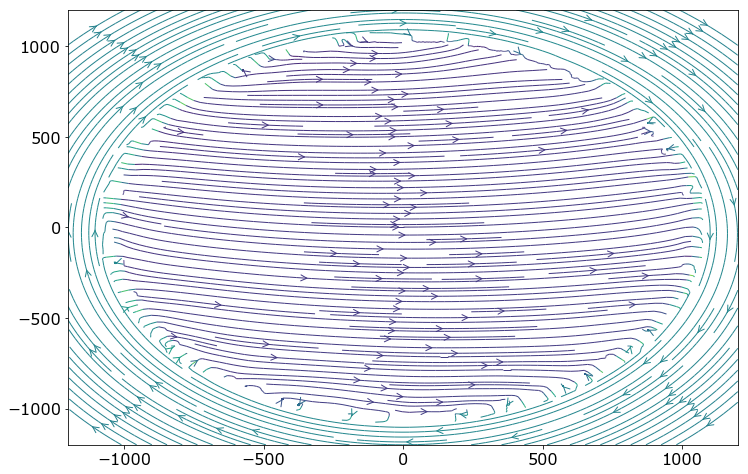

In [47]:
tmp_df = df_helix_v3.query('Z==0')
piv_bx = tmp_df.pivot('X', 'Y', 'Bx')
piv_by = tmp_df.pivot('X', 'Y', 'By')
x = piv_bx.columns.values
y = piv_bx.index.values
bx = piv_bx.values
by = piv_by.values

fig = plt.figure()
ax = fig.add_subplot(111)
color=2*np.log(np.hypot(bx, by))
ax.streamplot(x, y, by, bx, linewidth=1, cmap='viridis',
              density=3, color=color, arrowstyle='->', arrowsize=1.5)




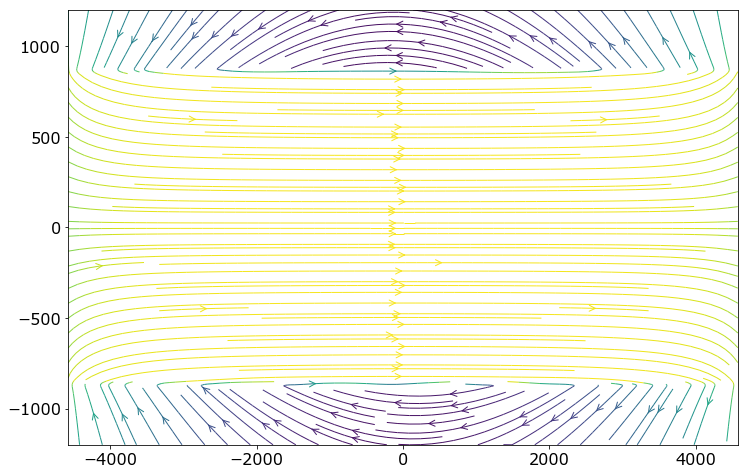

In [46]:
tmp_df = df_helix_v3.query('Y==-625')
piv_bx = tmp_df.pivot('X', 'Z', 'Bx')
piv_bz = tmp_df.pivot('X', 'Z', 'Bz')
x = piv_bx.columns.values
z = piv_bx.index.values
bx = piv_bx.values
bz = piv_bz.values

fig = plt.figure()
ax = fig.add_subplot(111)
color=2*np.log(np.hypot(bz, bx))
ax.streamplot(x, z, bz, bx, linewidth=1, cmap='viridis',
              density=2, color=color, arrowstyle='->', arrowsize=1.5)

